# Indicators of Heavy Traffic on I-94

## Introduction

In this project, we are going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The data contained in this set was reccorded in a station located approximately midway between Minneapolis and Saint Paul. For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis only consider the westbound traffic in the proximity of the station and we should avoid generalizing our results for the entire I-94 highway.

The goal of our analysis is to determine what indicators of heavy traffic on I-94, as weather type, time of the day, time of the week, etc.

First we will open and read the file and explore the first and last rows, as well as check the data type of each column.

In [1]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
i_94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
i_94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns with no null values. Each row describes traffic and weather data for a specific hour. The data starts from 2012-10-02 09:00:00 and ends at 2018-09-30 23:00:00.

## Analyzing Traffic Volume

We're going to start our analysis by examining the distribution of the ``traffic_volume`` column.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

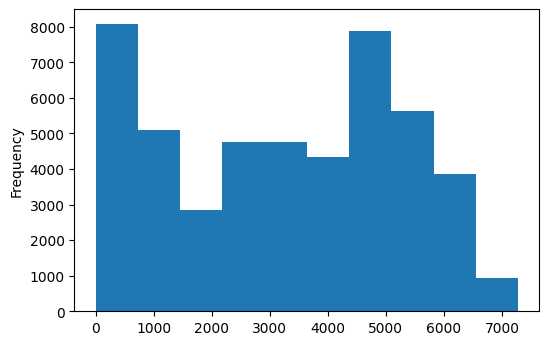

In [6]:
i_94['traffic_volume'].plot.hist()

In [7]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were 1,193 or less cars passing the station. We can suppose that happens during nightime. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

Following this observation we can conclude that we will need to consider the big influence of daytime or nighttime in our analysis.

## Traffic Volume: Day vs. Night

We will start by dividing the dataset into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

In [9]:
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour < 7) | (i_94['date_time'].dt.hour >= 19)]
print(night.shape)

(23877, 9)
(24327, 9)


There is a significant difference in row numbers between day and night, with more missing values for daytime hours.

Now we will plot the histograms of both daytime and nightime side by side to easily compare them.

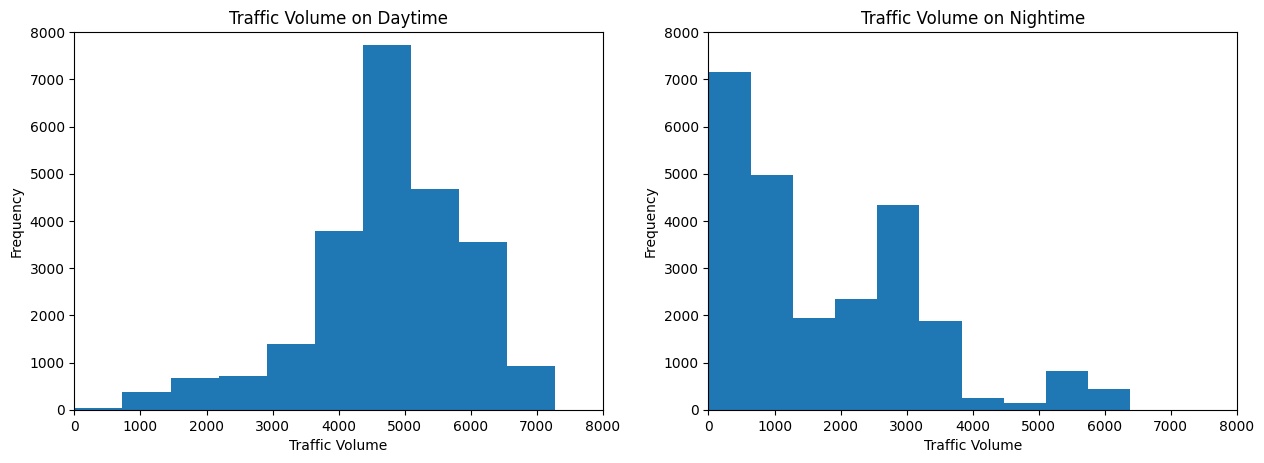

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume on Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])
          
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume on Nightime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.show()

In [11]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. Most of the traffic volume values are high. There are 4,252 or more cars passing the station each hour 75% of the time.

In the other side, the nighttime data is right skewed. Most of the traffic volume values are low. 75% of the time the number of cars that passed the station each hour was less than 2,819 cars.

Although there are some measurements of over 5,000 cars per hour during night, we proved that the traffic at this time of the day is generally light.

The main goal of this analysis is to find indicators of heavy traffic, so we will only focus on the daytime data moving forward.

## Time Indicators

We are going to look at a few line plots showing how the traffic volume changes according to the following time indicators:

* Month
* Day of the week
* Time of day

### Month

Let's start first analysing the traffic volume depending on the month.

In [13]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

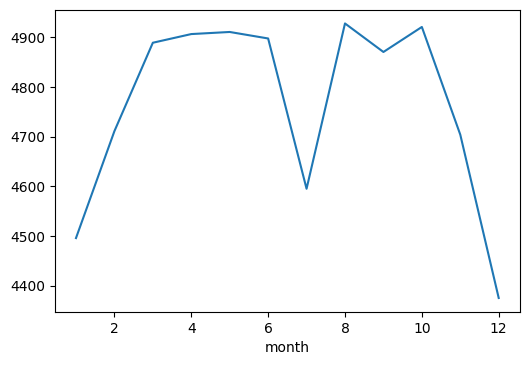

In [14]:
by_month['traffic_volume'].plot.line()
plt.show()

The traffic seems less heavy during winter season (November–February) and more intense during warmer months (March–October), with the expection of the month of July. In order to discover why the value of the month of July differs greatly with the trend

In [15]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7].groupby('year').mean()
only_july['traffic_volume']

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64

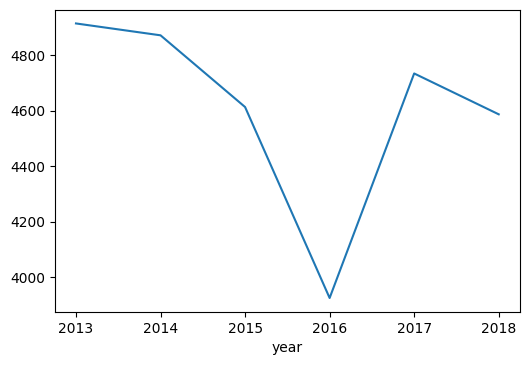

In [16]:
only_july['traffic_volume'].plot.line()
plt.show()

We can observe that the traffic is pretty heavy in July, similar to the other warm months, with the only exception of 2016. We found the possible reason being the road construction [work done in July 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).

Therefore, we can conclude that during warm months generally the traffic is heavier compared to cold months. In a warm month, we can expect for each hour of daytime a traffic volume close to 5,000 cars.

### Day of the week

Now we will look at a more granular indicator, the day of the week (0 is Monday, 6 is Sunday).

In [17]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

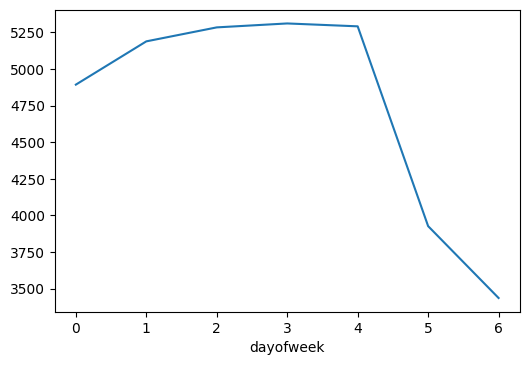

In [18]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

As expected, traffic volume is significantly heavier on business days (Monday – Friday) with values around 5,000 cars per hour on average. Traffic is lighter on weekends, with values below 4,000 cars.

### Time of the day

In order to analyse the data based on time of the day (only daytime), we will need to separate bussiness days and weekends, which are expected to show completely different patterns.

In [22]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_bussiness = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_bussiness['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 600x400 with 0 Axes>

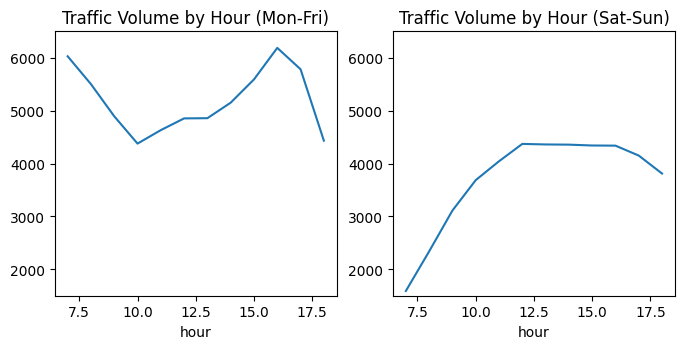

In [31]:
plt.figure()
plt.figure(figsize=(8,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour (Mon-Fri)')
plt.ylim([1500,6500])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour (Sat-Sun)')
plt.ylim([1500,6500])

plt.show

As expected, the traffic is heavier during bussiness days, with rush hours around 7 and 16, the time when most people travel from home to work and back. Around these two peak hours we see volumes of over 6,000 cars, that decrease to around 4,5000 cars on non-peak hours, being 10 and 18 the hours during the day with less traffic volume.

### Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: ``temp``, ``rain_1h``, ``snow_1h``, ``clouds_all``, ``weather_main`` and ``weather_description``.

Let's first check the correlation between the numerical columns with ``traffic_volume`` column.

In [32]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation, however the value is just +0.13. The other columns do not show any strong correlation with the traffic volume.

Let's generate a scatter plot to visualize the correlation between ``temp`` and ``traffic_volume``.

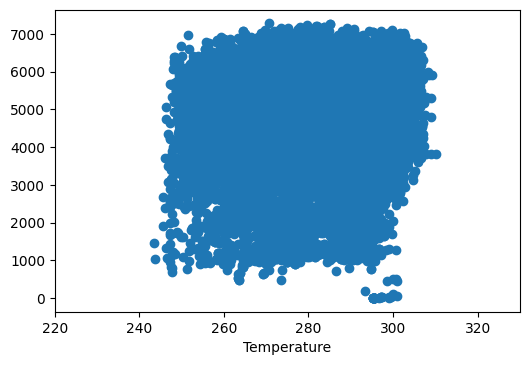

In [38]:
plt.scatter(day['temp'], day['traffic_volume'])
plt.xlabel('Traffic volume')
plt.xlabel('Temperature')
plt.xlim([220,330])
plt.show()

We can conclude that temperature does not show a strong correlation with traffic volume.

## Weather Types

Finally, we will check the categorical columns in our data: ``weather_main`` and ``weather_description``.

First, the ``weather main`` consists of a classification of 11 general types of weather.

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64


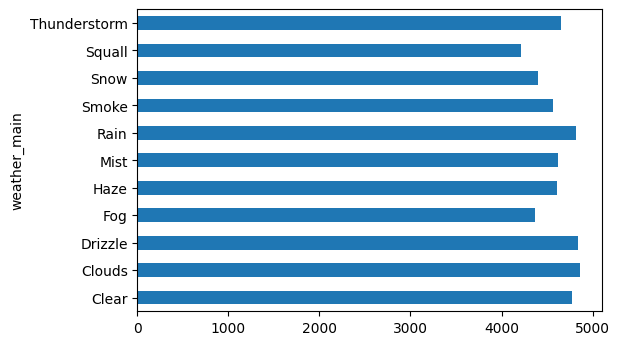

In [44]:
by_weather_main = day.groupby('weather_main').mean()
print(by_weather_main['traffic_volume'])
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is no weather type where traffic volume exceeds 5,000 cars, although we can see a clear decrease in traffic volume when there is fog, snow and particularly squall, which might be because people try to not take a car when the road is foggy or there is snow.

We will also group by ``weather_description``, which has a more granular weather classification.

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

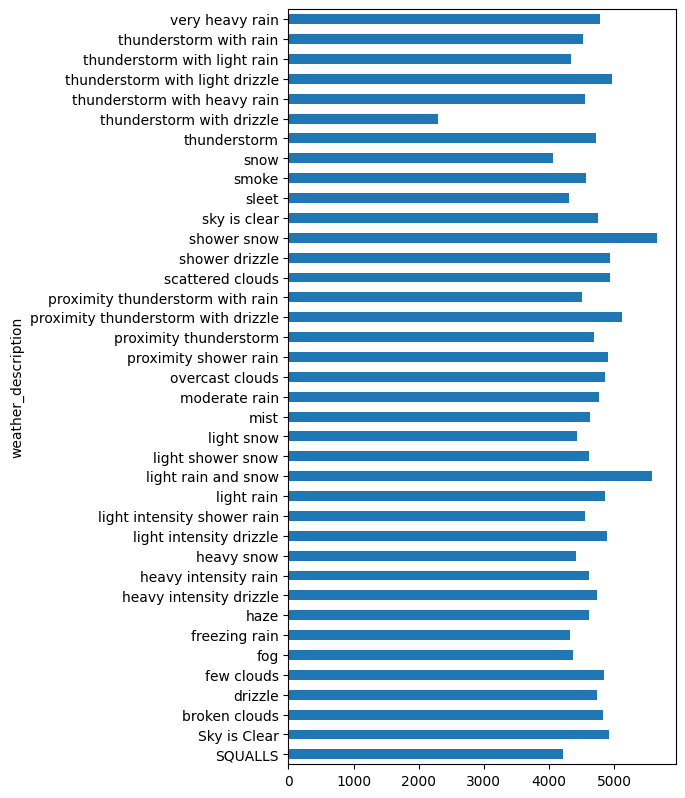

In [46]:
by_weather_description = day.groupby('weather_description').mean()
print(by_weather_description['traffic_volume'])
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

According to the data, tt looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It looks like when the weather is bad, but not extreme enough for vehicle users to not take the road, the traffic density reaches maximum values.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

1. Time indicators
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.
2. Weather indicators
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle